# **Análise do Impacto da Música na Saúde Mental**

Este projeto tem como objetivo analisar os dados de uma pesquisa que investiga a relação entre os hábitos de escuta musical e a saúde mental. O foco é explorar como diferentes preferências musicais, frequências de escuta e características pessoais se correlacionam com condições de saúde mental autodeclaradas, como ansiedade, depressão, insônia e TOC (Transtorno Obsessivo-Compulsivo).

**Grupo do Projeto:**
- Hugo Ryan Santos de Franca Silva
- Micael Oliveira de Lima Toscano
- Rafael Henrique Ribeiro Amancio
- Sergio Cauã dos Santos

---
**Seção 1: Importação, Transformação e Exploração**
---

---
### **Importando Bibliotecas e Lendo os Dados**

Para começar nossa análise, precisamos importar as bibliotecas e ler os dados do dataset.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import func
import numpy as np
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("mxmh_survey_results.csv")

In [4]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


### **Alterando os Tipos dos Dados**

Alteramos os tipos dos dados que estavam classificados como "object", não sendo possível realizar nossas análises por conta disso. Usamos uma função criada por nós no arquivo "func.py" deste projeto.

In [5]:
func.alterar_type(df)

### **Traduzindo as Colunas**

Para facilitar o trabalho, vamos traduzir as colunas do dataset do inglês para o português.

In [6]:
colunas_traduzidas = [
    "data_e_hora_envio", "idade", "servico_de_streaming_principal",
    "horas_por_dia", "enquanto_trabalha",
    "instrumentalista", "compositor", "genero_fav",
    "exploratorio", "em_outros_idiomas", "bpm",
    "frequencia_musica_classica", "frequencia_country",
    "frequencia_edm", "frequencia_folk", "frequencia_gospel",
    "frequencia_hip_hop", "frequencia_jazz", "frequencia_kpop",
    "frequencia_latin", "frequencia_lofi", "frequencia_metal",
    "frequencia_pop", "frequencia_rb", "frequencia_rap",
    "frequencia_rock", "frequencia_musica_videogame",
    "ansiedade", "depressao", "insonia", "toc",
    "efeitos_na_saude_mental", "permissoes"
]

legenda = """
0 - Nunca
1 - Raramente
2 - Algumas vezes
3 - Bem frequentemente """

Exibindo o Dataset já traduzido:

In [7]:
df.columns = colunas_traduzidas
df

,data_e_hora_envio,idade,servico_de_streaming_principal,horas_por_dia,enquanto_trabalha,instrumentalista,compositor,genero_fav,exploratorio,em_outros_idiomas,...,frequencia_rb,frequencia_rap,frequencia_rock,frequencia_musica_videogame,ansiedade,depressao,insonia,toc,efeitos_na_saude_mental,permissoes
0,8/27/2022 19:29:02,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1.0,1.0,...,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1.0,0.0,...,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0.0,1.0,...,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1.0,1.0,...,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1.0,0.0,...,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,1.0,1.0,0.0,Rock,1.0,1.0,...,0.0,1.0,3.0,0.0,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,1.0,1.0,0.0,Pop,1.0,1.0,...,0.0,0.0,2.0,2.0,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,1.0,0.0,1.0,Rap,1.0,0.0,...,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,1.0,1.0,0.0,Classical,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0,Improve,I understand.


### **Selecionando Apenas Colunas Numéricas**

Vamos selecionar apenas as colunas numéricas para podermos fazer análises mais efetivas.

In [8]:
lista_colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
print("Lista de colunas numéricas")
print(lista_colunas_numericas)

Lista de colunas numéricas
['idade', 'horas_por_dia', 'enquanto_trabalha', 'instrumentalista', 'compositor', 'exploratorio', 'em_outros_idiomas', 'bpm', 'frequencia_musica_classica', 'frequencia_country', 'frequencia_edm', 'frequencia_folk', 'frequencia_gospel', 'frequencia_hip_hop', 'frequencia_jazz', 'frequencia_kpop', 'frequencia_latin', 'frequencia_lofi', 'frequencia_metal', 'frequencia_pop', 'frequencia_rb', 'frequencia_rap', 'frequencia_rock', 'frequencia_musica_videogame', 'ansiedade', 'depressao', 'insonia', 'toc']


---
# **Seção 2: Medidas de Centralidade de Dispersão**
---


### **Calculando Medidas de Centralidade e Dispersão**

Uma ótima forma de analisar os dados de maneira inicial é analisando as medidas básicas de centralidade e dispersão do dataset. É o que vamos fazer aqui nesta seção.

In [9]:
medidas_dispersao = {}

mediana_bpm = df["bpm"].median()
df.loc[df["bpm"] > 300, "bpm"] = mediana_bpm

for column in lista_colunas_numericas:
    medidas_dispersao[column] = {
        'Media': df[column].mean(),
        'Mediana': df[column].median(),
        'Moda': df[column].mode()[0],
        'Desvio Padrão': df[column].std(),
        'Variância': df[column].var(),
        'Amplitude': df[column].max() - df[column].min()
    }

# Convertendo para DataFrame
medidas_df = pd.DataFrame(medidas_dispersao).T
medidas_df.columns = ['Media', 'Mediana', 'Moda', 'Desvio Padrão', 'Variância', 'Amplitude']
medidas_df

,Media,Mediana,Moda,Desvio Padrão,Variância,Amplitude
idade,25.206803,21.0,18.0,12.054970,145.322297,79.0
horas_por_dia,3.572758,3.0,2.0,3.028199,9.169988,24.0
enquanto_trabalha,0.789905,1.0,1.0,0.407654,0.166182,1.0
instrumentalista,0.321038,0.0,0.0,0.467195,0.218271,1.0
compositor,0.171429,0.0,0.0,0.377140,0.142234,1.0
exploratorio,0.713315,1.0,1.0,0.452521,0.204775,1.0
em_outros_idiomas,0.551913,1.0,1.0,0.497638,0.247643,1.0
bpm,122.616852,120.0,120.0,33.852120,1145.966021,220.0
frequencia_musica_classica,1.335598,1.0,1.0,0.988442,0.977017,3.0
frequencia_country,0.817935,1.0,0.0,0.922584,0.851161,3.0


Como podemos ver, a média dos valores estavam muito fora de formatação, por isso precisamos formatar e ajusta-las:

In [10]:
# Arredondar os valores para duas casas decimais
df_medidas_centralidade = medidas_df.map(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)

# Exibir o DataFrame formatado
display(df_medidas_centralidade)

,Media,Mediana,Moda,Desvio Padrão,Variância,Amplitude
idade,25.21,21.00,18.00,12.05,145.32,79.00
horas_por_dia,3.57,3.00,2.00,3.03,9.17,24.00
enquanto_trabalha,0.79,1.00,1.00,0.41,0.17,1.00
instrumentalista,0.32,0.00,0.00,0.47,0.22,1.00
compositor,0.17,0.00,0.00,0.38,0.14,1.00
exploratorio,0.71,1.00,1.00,0.45,0.20,1.00
em_outros_idiomas,0.55,1.00,1.00,0.50,0.25,1.00
bpm,122.62,120.00,120.00,33.85,"1,145.97",220.00
frequencia_musica_classica,1.34,1.00,1.00,0.99,0.98,3.00
frequencia_country,0.82,1.00,0.00,0.92,0.85,3.00


---
# **Seção 3: Exibindo os Boxplots**
---

### **Exibindo Apenas um Boxplot de uma Categoria**

Boxplots são uma ótima forma de mostrar como os dados estão dispostos, exibindo a mediana, os quartis e os outliers de forma visual. Por isso, vamos plotar alguns nesta seção.

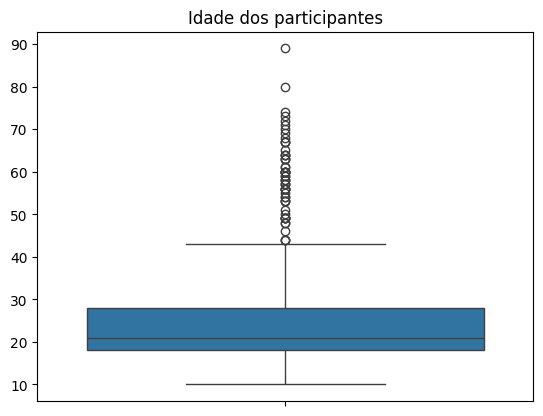

In [11]:
func.exibir_boxplot(dataset = df, coluna = "idade", orientacao = "v", titulo = "Idade dos participantes")

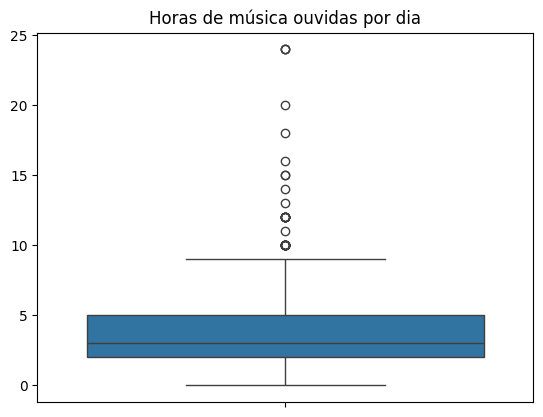

In [12]:
func.exibir_boxplot(df, "horas_por_dia", "v", "Horas de música ouvidas por dia")

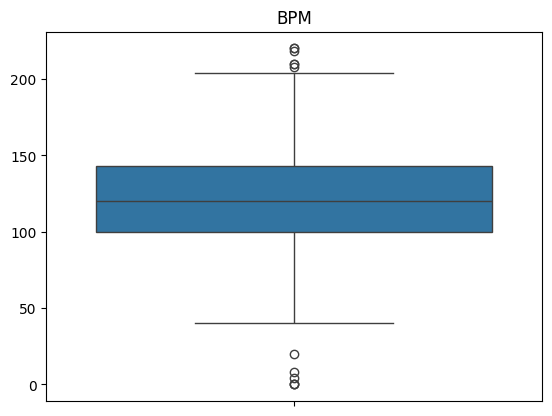

In [13]:
func.exibir_boxplot(df, "bpm", "v", "BPM")

### **Exibindo Vários Boxplots de Mesma Categoria**

Agora vamos plotar alguns boxplots de mesma categoria.

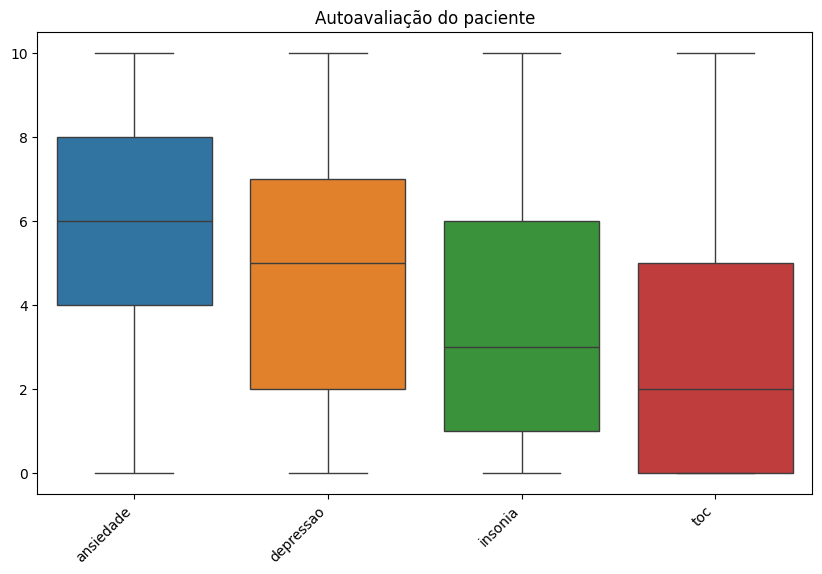

In [14]:
func.boxplot_de_varias(df, "Autoavaliação do paciente", 10, 6, "","ansiedade", "depressao", "insonia", "toc")

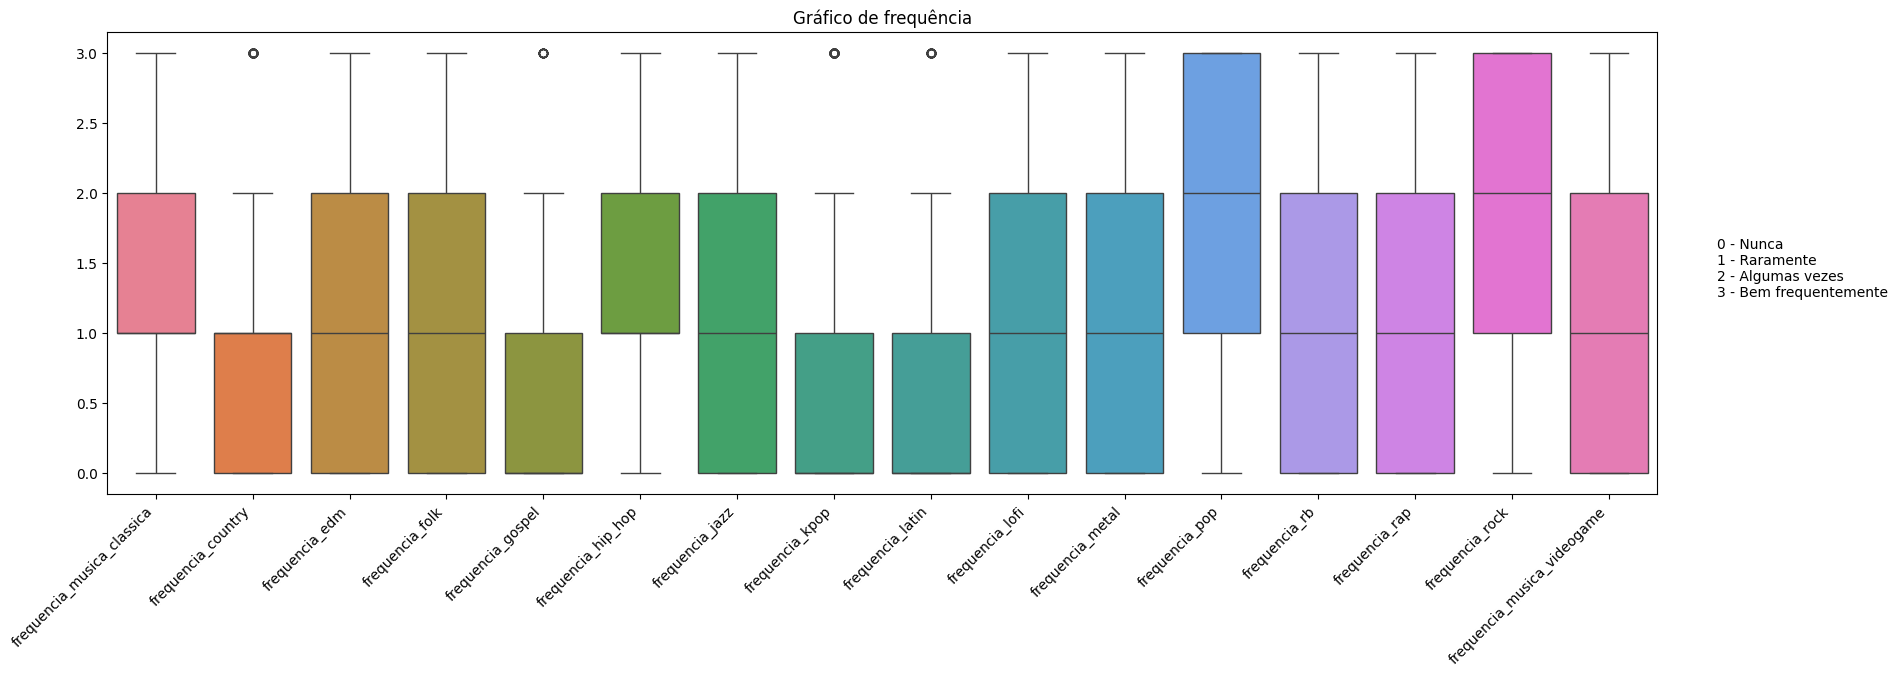

In [15]:
func.boxplot_de_varias(df, "Gráfico de frequência", 20, 6, legenda, "frequencia_musica_classica", "frequencia_country", "frequencia_edm", "frequencia_folk", "frequencia_gospel", "frequencia_hip_hop", "frequencia_jazz", "frequencia_kpop","frequencia_latin", "frequencia_lofi", "frequencia_metal", "frequencia_pop", "frequencia_rb", "frequencia_rap", "frequencia_rock", "frequencia_musica_videogame")

---
# **Seção 4: Correlação**
---

Aqui vamos realizar análises de correlação entre os doados e plotar gráficos para representar isso visualmente.

### **Gráficos de Dispersão**

In [16]:
# Para melhor visualização dos dados.
df['minutos_por_dia'] = df['horas_por_dia'] * 60 

# Tratando alguns valores que estão fora do 'normal'.
mediana_minutos_dia = df['minutos_por_dia'].median()

df.loc[df['minutos_por_dia'] > 900, 'minutos_por_dia'] = mediana_minutos_dia

print(df['minutos_por_dia'].describe()) # Exibe um resumo da coluna 'minutos_por_dia'

count    736.000000
mean     205.561141
std      153.996701
min        0.000000
25%      120.000000
50%      180.000000
75%      240.000000
max      900.000000
Name: minutos_por_dia, dtype: float64


<Axes: xlabel='idade', ylabel='minutos_por_dia'>

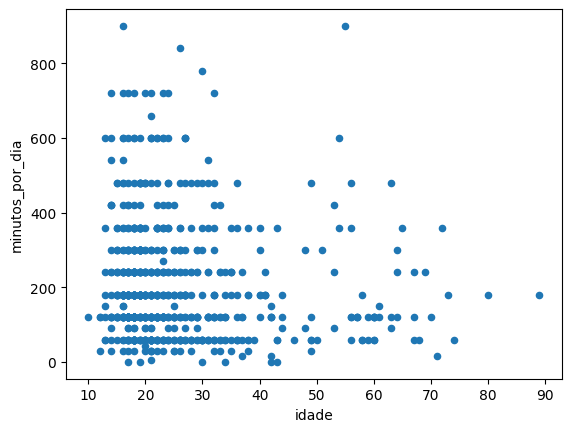

In [17]:
df.plot.scatter(x= 'idade', y = 'minutos_por_dia')

<Axes: xlabel='idade', ylabel='ansiedade'>

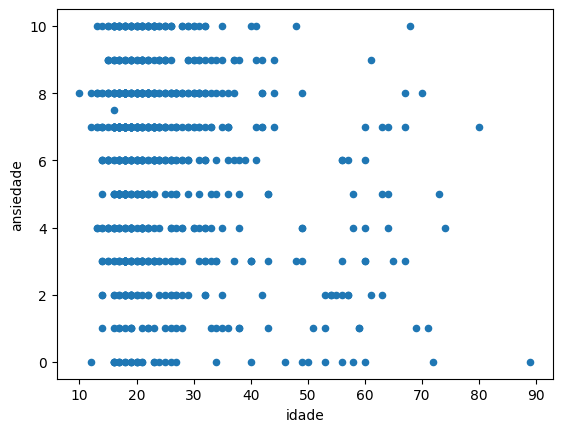

In [18]:
df.plot.scatter(x='idade', y='ansiedade')

<Axes: xlabel='bpm', ylabel='idade'>

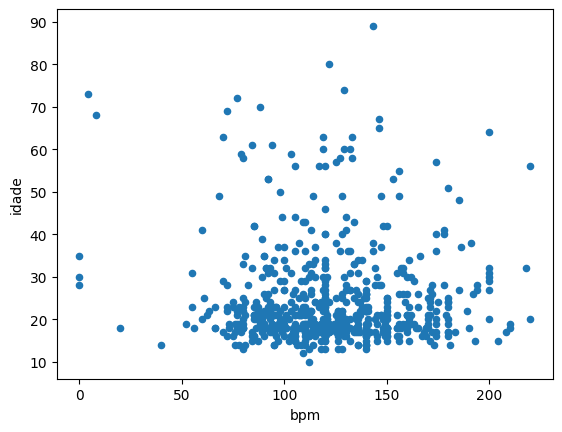

In [19]:
df.plot.scatter(x= 'bpm', y = 'idade')

<Axes: xlabel='bpm', ylabel='minutos_por_dia'>

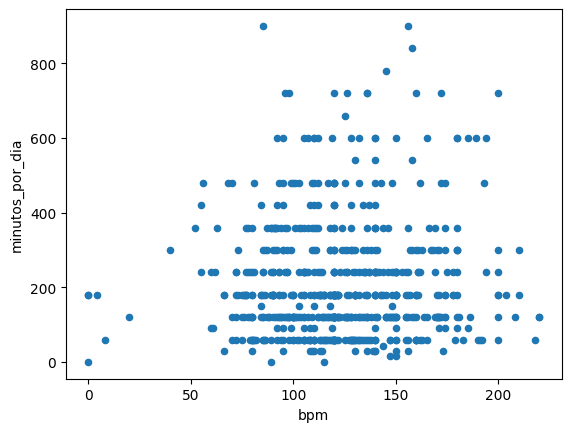

In [20]:
df.plot.scatter(x= 'bpm', y= 'minutos_por_dia')

### **Histograma**

Uma ótima forma de ver como os dados estão dispostos no dataset é por meio de histogramas.

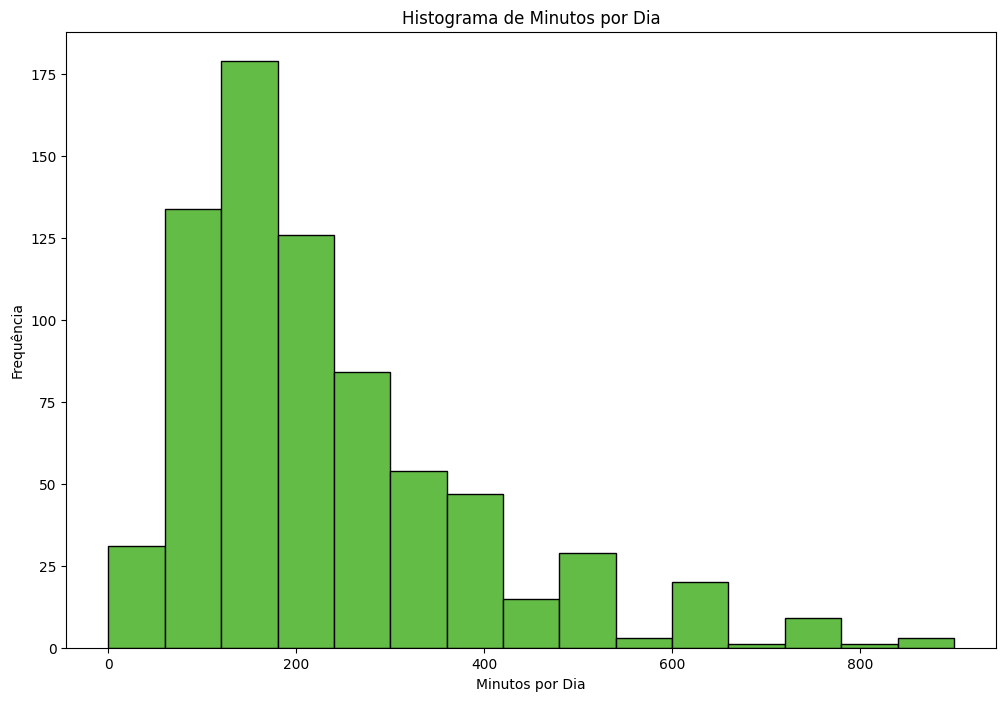

In [21]:
#Histograma de quantos minutos por dia as pessoas ouvem música

plt.figure(figsize=(12, 8))  # Define o tamanho da figura (largura, altura)
plt.hist(df['minutos_por_dia'], bins=15, color='#63bc46', edgecolor='black')  # Soft blue color

# Adiciona título e rótulos aos eixos
plt.title('Histograma de Minutos por Dia')
plt.xlabel('Minutos por Dia')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()

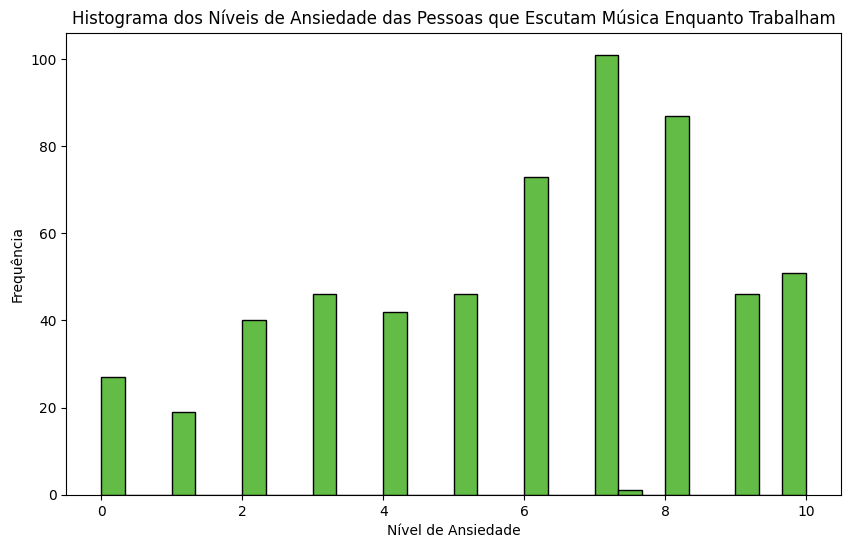

In [22]:
# Histograma das pessoas que escutam música enquanto trabalham e seus níveis de ansiedade.

df_musica_trabalho = df[df['enquanto_trabalha'] == 1]   #Filtra as pessoas que escutam música enquanto trabalham

plt.figure(figsize=(10, 6))  # Define o tamanho da figura (largura, altura)
plt.hist(df_musica_trabalho['ansiedade'], bins=30, color='#63bc46', edgecolor='black')

plt.title('Histograma dos Níveis de Ansiedade das Pessoas que Escutam Música Enquanto Trabalham')
plt.xlabel('Nível de Ansiedade')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()

### **Relação entre Número de Músicas e Bpm**

Vamos ver se existe alguma relação entre o número de Músicas e o BPM (Batidas por minuto) de cada uma delas.

In [23]:
#tratamento da coluna bpm 
mediana_bpm = df[df['bpm'] >= 40]['bpm'].median()

df['bpm'] = np.where(df['bpm'] < 40, mediana_bpm, df['bpm'])

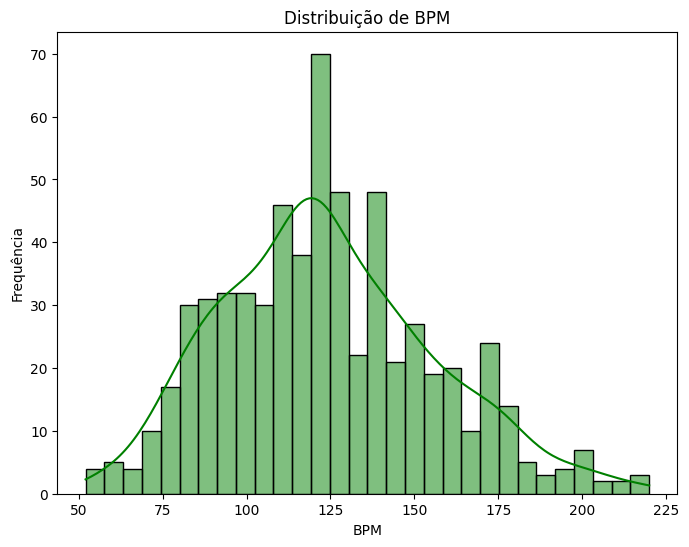

In [24]:
# Define the filter condition
df_filtered = df[df['bpm'] > 40]  # Example condition: bpm greater than 40

# Plotting the histogram
plt.figure(figsize=(8, 6))  
sns.histplot(df_filtered['bpm'], bins=30, kde=True, color='green')
plt.title('Distribuição de BPM')
plt.xlabel('BPM')
plt.ylabel('Frequência')
plt.show()

### **Histogramas de Níveis de Sintomas de Saúde Mental: Número de Participantes X Niveis de Depressão, Insônia e TOC**

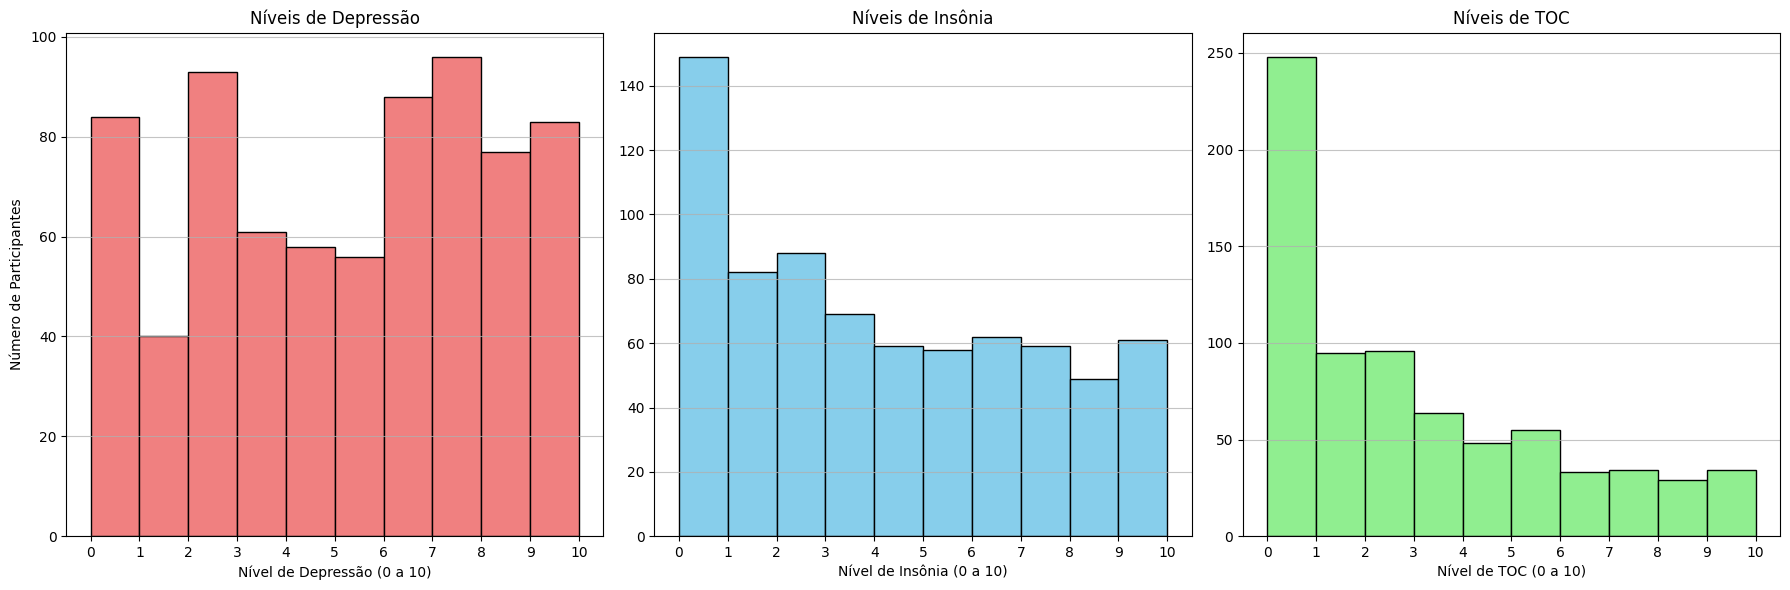

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha, 3 colunas

# Histograma para Depressão
axes[0].hist(df['depressao'], bins=10, color='lightcoral', edgecolor='black')
axes[0].set_title('Níveis de Depressão')
axes[0].set_xlabel('Nível de Depressão (0 a 10)')
axes[0].set_ylabel('Número de Participantes')
axes[0].set_xticks(range(0, 11))  # Define as marcas no eixo X de 0 a 10
axes[0].grid(axis='y', alpha=0.75)

# Histograma para Insônia
axes[1].hist(df['insonia'], bins=10, color='skyblue', edgecolor='black')
axes[1].set_title('Níveis de Insônia')
axes[1].set_xlabel('Nível de Insônia (0 a 10)')
axes[1].set_xticks(range(0, 11))
axes[1].grid(axis='y', alpha=0.75)

# Histograma para TOC
axes[2].hist(df['toc'], bins=10, color='lightgreen', edgecolor='black')
axes[2].set_title('Níveis de TOC')
axes[2].set_xlabel('Nível de TOC (0 a 10)')
axes[2].set_xticks(range(0, 11))
axes[2].grid(axis='y', alpha=0.75)

plt.tight_layout()

plt.show()

Fizemos algumas alterações para melhorar a visualização dos histogramas: 

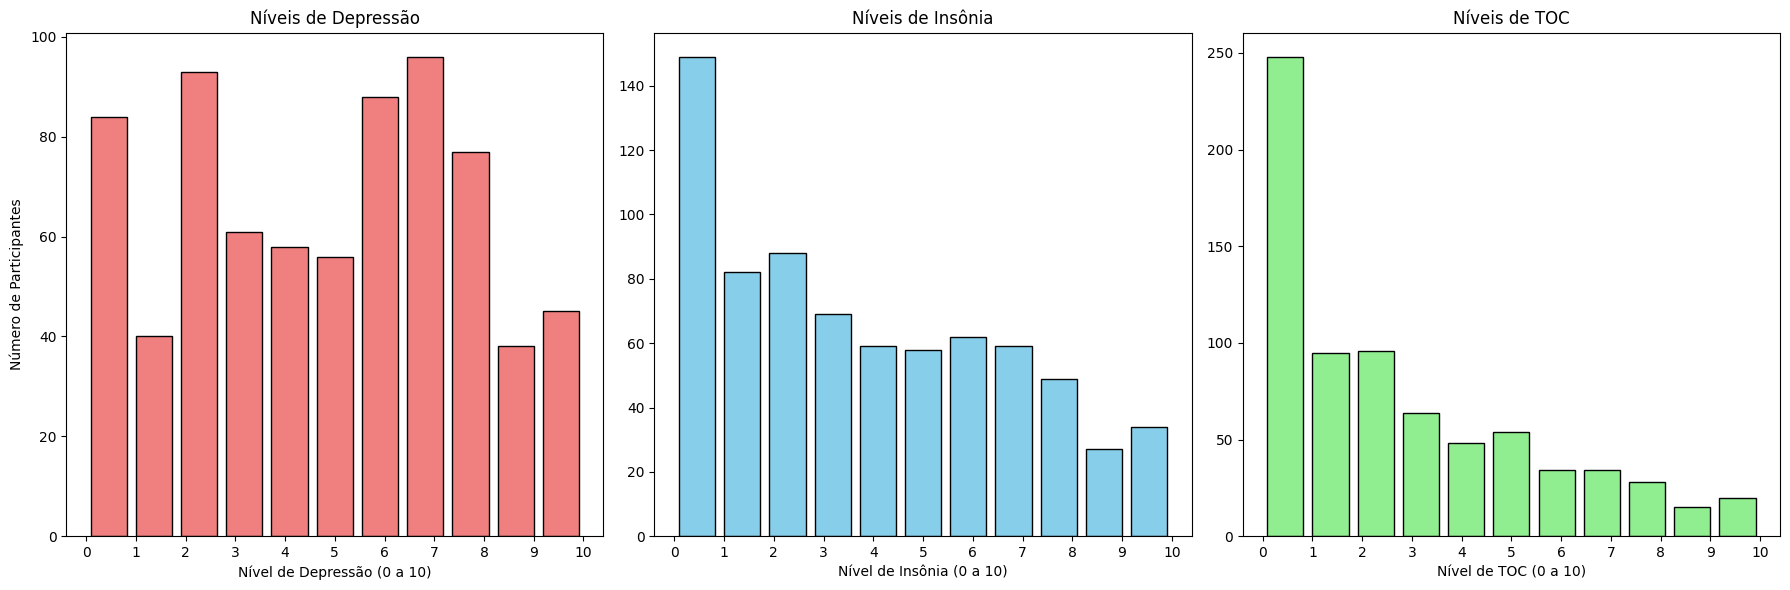

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha, 3 colunas

# Definir limite máximo comum para o eixo Y (frequência)
max_freq = max(df['depressao'].value_counts().max(), 
               df['insonia'].value_counts().max(), 
               df['toc'].value_counts().max())

# Histograma para Depressão
axes[0].hist(df['depressao'], bins=11, color='lightcoral', edgecolor='black', rwidth=0.8)
axes[0].set_title('Níveis de Depressão')
axes[0].set_xlabel('Nível de Depressão (0 a 10)')
axes[0].set_ylabel('Número de Participantes')
axes[0].set_xticks(range(0, 11, 1))
axes[0].grid(False)  # Desligar linhas de grade

# Histograma para Insônia
axes[1].hist(df['insonia'], bins=11, color='skyblue', edgecolor='black', rwidth=0.8)
axes[1].set_title('Níveis de Insônia')
axes[1].set_xlabel('Nível de Insônia (0 a 10)')
axes[1].set_xticks(range(0, 11, 1))
axes[1].grid(False)  # Desligar linhas de grade

# Histograma para TOC
axes[2].hist(df['toc'], bins=11, color='lightgreen', edgecolor='black', rwidth=0.8)
axes[2].set_title('Níveis de TOC')
axes[2].set_xlabel('Nível de TOC (0 a 10)')
axes[2].set_xticks(range(0, 11, 1))
axes[2].grid(False)  # Desligar linhas de grade

plt.tight_layout()

plt.show()

Como vemos, os valores de y estão fora de padrão, vamos converter o número de participantes em porcentagem para melhor entendimento dos dados:

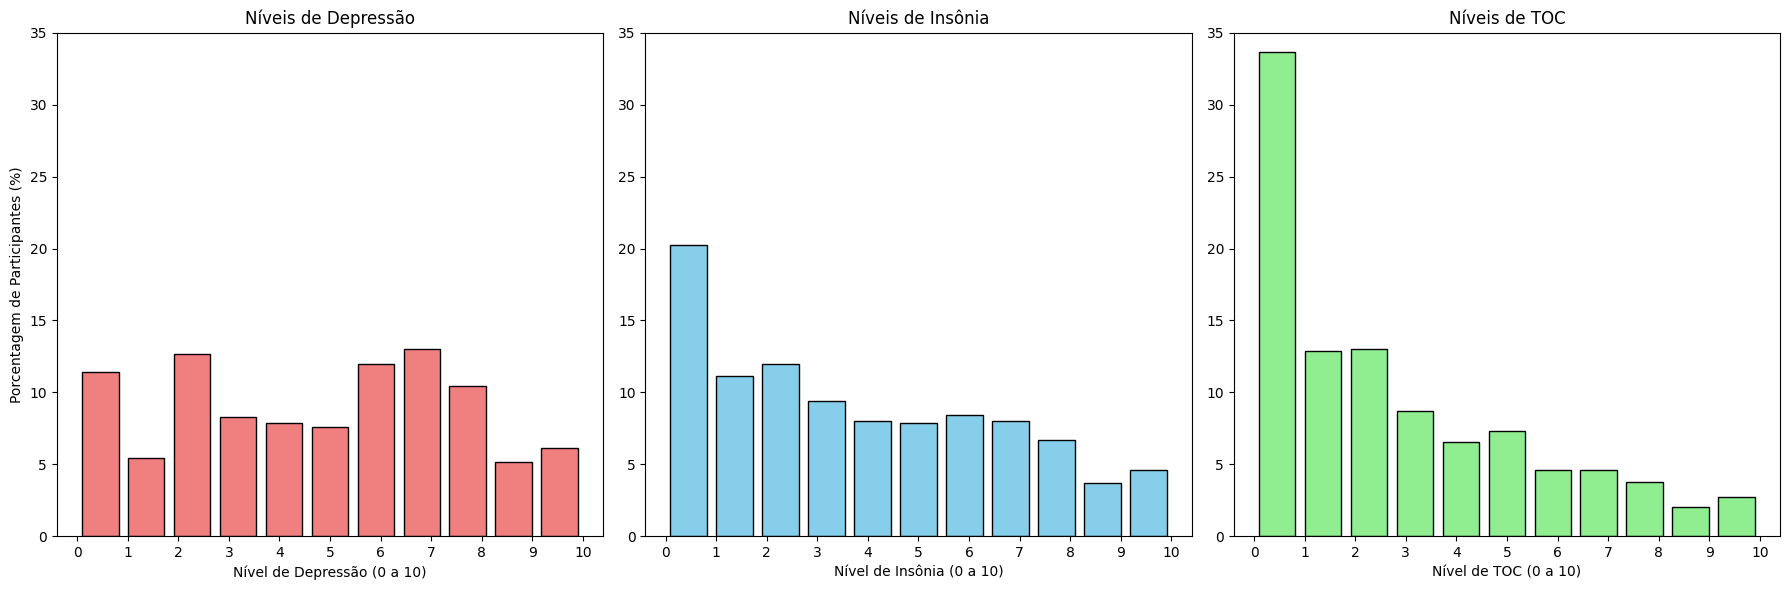

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha, 3 colunas

# Definir limite máximo fixo para o eixo Y (porcentagem)
max_y_limit = 35 # Atribuimos 35 ao vamor máximo de porcentagem para melhor visualização 

# Histograma para Depressão
axes[0].hist(df['depressao'], bins=11, color='lightcoral', edgecolor='black', rwidth=0.8, weights=np.ones(len(df)) / len(df) * 100)
axes[0].set_title('Níveis de Depressão')
axes[0].set_xlabel('Nível de Depressão (0 a 10)')
axes[0].set_ylabel('Porcentagem de Participantes (%)')
axes[0].set_xticks(range(0, 11, 1))
axes[0].set_ylim(0, max_y_limit)  # Define o limite superior do eixo Y
axes[0].grid(False)

# Histograma para Insônia
axes[1].hist(df['insonia'], bins=11, color='skyblue', edgecolor='black', rwidth=0.8, weights=np.ones(len(df)) / len(df) * 100)
axes[1].set_title('Níveis de Insônia')
axes[1].set_xlabel('Nível de Insônia (0 a 10)')
axes[1].set_xticks(range(0, 11, 1))
axes[1].set_ylim(0, max_y_limit)  # Define o limite superior do eixo Y
axes[1].grid(False)

# Histograma para TOC
axes[2].hist(df['toc'], bins=11, color='lightgreen', edgecolor='black', rwidth=0.8, weights=np.ones(len(df)) / len(df) * 100)
axes[2].set_title('Níveis de TOC')
axes[2].set_xlabel('Nível de TOC (0 a 10)')
axes[2].set_xticks(range(0, 11, 1))
axes[2].set_ylim(0, max_y_limit)  # Define o limite superior do eixo Y
axes[2].grid(False)

plt.tight_layout()

plt.show()

### **Calculando Gêneros Mais Escutados**

Vamos ver quais foram os gêneros mais escutados com base nos dados dispostos.

C:\Users\User\AppData\Local\Temp\ipykernel_49400\361076517.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequencia', y='Genero', data=df_generos, palette='viridis')


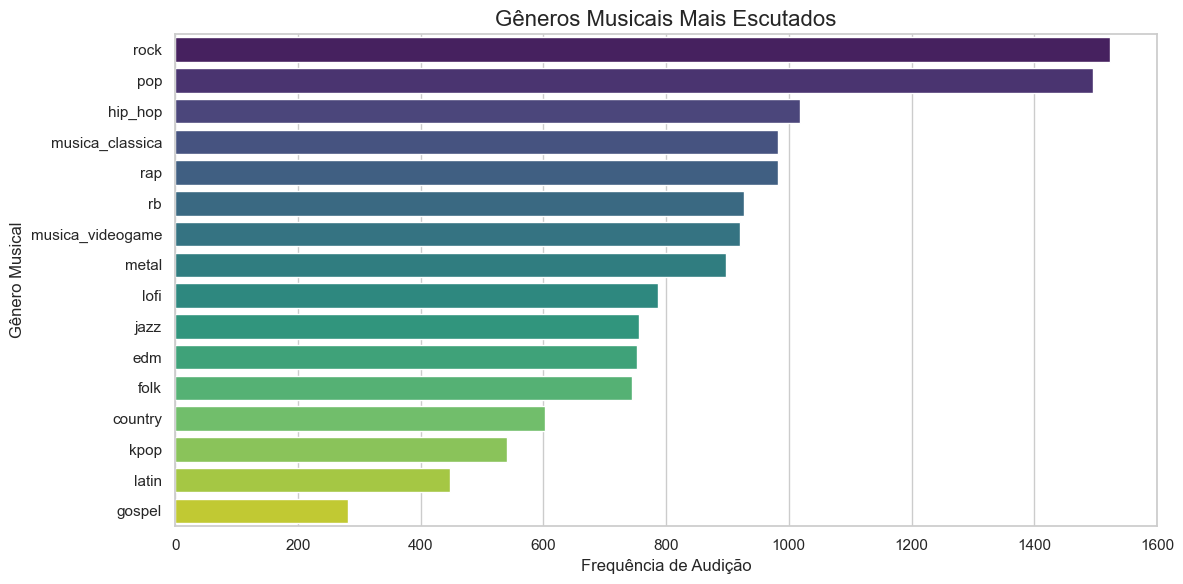

In [28]:
sns.set(style="whitegrid")

# Criando uma lista de gêneros e suas respectivas frequências
generos = ['musica_classica', 'country', 'edm', 'folk', 'gospel', 'hip_hop', 'jazz', 'kpop', 'latin', 
           'lofi', 'metal', 'pop', 'rb', 'rap', 'rock', 'musica_videogame']

# Calculando a soma das frequências para cada gênero
frequencias = df[['frequencia_musica_classica', 'frequencia_country', 'frequencia_edm', 'frequencia_folk', 
                  'frequencia_gospel', 'frequencia_hip_hop', 'frequencia_jazz', 'frequencia_kpop', 
                  'frequencia_latin', 'frequencia_lofi', 'frequencia_metal', 'frequencia_pop', 
                  'frequencia_rb', 'frequencia_rap', 'frequencia_rock', 'frequencia_musica_videogame']].sum()

# Criando um DataFrame com os gêneros e suas frequências
df_generos = pd.DataFrame({'Genero': generos, 'Frequencia': frequencias}).sort_values(by='Frequencia', ascending=False)

# Criando gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequencia', y='Genero', data=df_generos, palette='viridis')

plt.title('Gêneros Musicais Mais Escutados', fontsize=16)
plt.xlabel('Frequência de Audição', fontsize=12)
plt.ylabel('Gênero Musical', fontsize=12)

plt.tight_layout()
plt.show()


### **Relacionando os 5 Gêneros mais Escutados com Sintomas de Saúde Mental** 

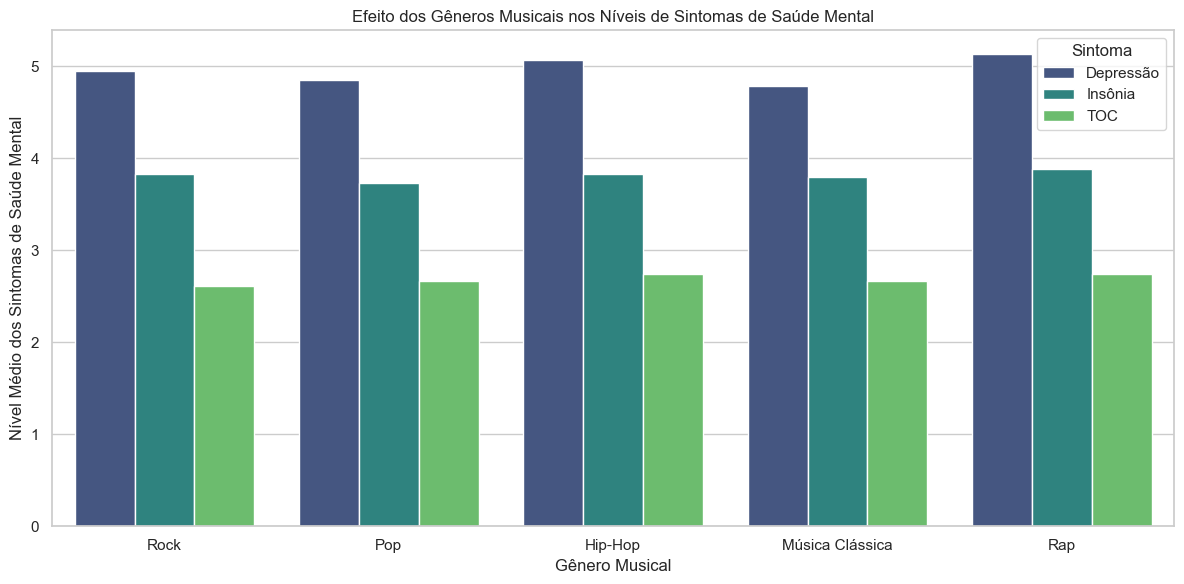

In [29]:
sns.set(style="whitegrid")

# Reestruturando os dados: média dos sintomas de saúde mental para diferentes níveis de frequência dos gêneros
df_generos = df[['frequencia_rock', 'frequencia_pop', 'frequencia_hip_hop', 'frequencia_musica_classica', 'frequencia_rap', 'depressao', 'insonia', 'toc']]

# Calculando a média dos sintomas de saúde mental para cada gênero musical
df_efeitos = pd.DataFrame({
    'Gênero': ['Rock', 'Pop', 'Hip-Hop', 'Música Clássica', 'Rap'],
    'Depressão': [
        df.loc[df['frequencia_rock'] > 0, 'depressao'].mean(),
        df.loc[df['frequencia_pop'] > 0, 'depressao'].mean(),
        df.loc[df['frequencia_hip_hop'] > 0, 'depressao'].mean(),
        df.loc[df['frequencia_musica_classica'] > 0, 'depressao'].mean(),
        df.loc[df['frequencia_rap'] > 0, 'depressao'].mean()
    ],
    'Insônia': [
        df.loc[df['frequencia_rock'] > 0, 'insonia'].mean(),
        df.loc[df['frequencia_pop'] > 0, 'insonia'].mean(),
        df.loc[df['frequencia_hip_hop'] > 0, 'insonia'].mean(),
        df.loc[df['frequencia_musica_classica'] > 0, 'insonia'].mean(),
        df.loc[df['frequencia_rap'] > 0, 'insonia'].mean()
    ],
    'TOC': [
        df.loc[df['frequencia_rock'] > 0, 'toc'].mean(),
        df.loc[df['frequencia_pop'] > 0, 'toc'].mean(),
        df.loc[df['frequencia_hip_hop'] > 0, 'toc'].mean(),
        df.loc[df['frequencia_musica_classica'] > 0, 'toc'].mean(),
        df.loc[df['frequencia_rap'] > 0, 'toc'].mean()
    ]
})

# Reorganizando os dados para formato longo (necessário para o gráfico de barras)
df_melted = df_efeitos.melt(id_vars='Gênero', var_name='Sintoma', value_name='Nível Médio')

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Gênero', y='Nível Médio', hue='Sintoma', data=df_melted, palette='viridis')

# Configurando o gráfico
plt.title('Efeito dos Gêneros Musicais nos Níveis de Sintomas de Saúde Mental')
plt.xlabel('Gênero Musical')
plt.ylabel('Nível Médio dos Sintomas de Saúde Mental')
plt.legend(title='Sintoma')

plt.tight_layout()
plt.show()

Percebemos com a análise acima que os níveis médios de sintomas de saúde mental de todos os gêneros musicais são parecidos, o que indica que possivelmente a música escutada por pessoas com depressão, insônia e TOC não influenciam tanto assim nesses sintomas de primeira instância.

---
# **Seção 5: Aplicando K-Means no Conjunto de Dados**
---

### **Análise Usando K-Means**

<Axes: >

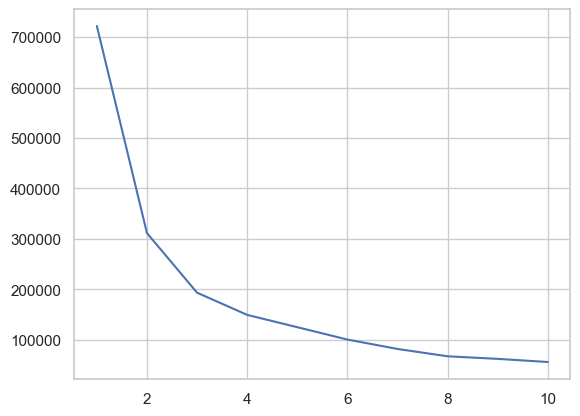

In [30]:
X = df[['idade', 'bpm']] # Escolhendo as colunas 'idade' e 'bpm'
X = X.dropna(subset=['idade', 'bpm']) 

inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

#mostrando o "cotovelo" do gráfico.

sns.lineplot(x=range(1,11), y=inertias)    

### **Aplicação do K-Means com 4 Clusters e Atribuição de Grupos**


O algoritmo K-Means é treinado com 4 clusters nos dados pré-processados. O parâmetro n_clusters define a quantidade de grupos desejada, enquanto random_state garante a reprodutibilidade dos resultados. Após o treinamento, uma nova coluna chamada 'cluster' é adicionada ao DataFrame, contendo os rótulos de cada ponto de dado conforme o cluster ao qual ele pertence. Isso será utilizado para análises posteriores dos grupos formados.

In [31]:
kmeans = KMeans(n_clusters=4, random_state=62)

kmeans.fit(X) 

X['cluster'] = kmeans.labels_

Plotando o gráfico

<Axes: xlabel='bpm', ylabel='idade'>

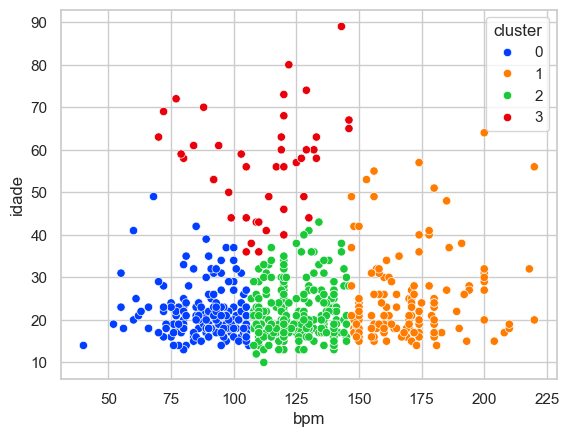

In [32]:
sns.scatterplot(data=X, x='bpm', y='idade', hue='cluster', palette='bright')

Com a exibição desse gráfico, podemos analisar que existe 4 grupos, que podem ser divididos em 2.
Os grupos [azul,verde,laranja] mostram que as pessoas entre 10 a 40 anos, apresentam uma maior diversidade em relação a velocidade da música.
O grupo [vermelho] mostra que pessoas mais velhas, tendem a ter uma preferência por músicas mais calmas.

### **Contando Quantos Elementos Existem em cada Cluster**

In [33]:
print(X['cluster'].value_counts())

cluster
2    265
0    175
1    145
3     44
Name: count, dtype: int64


Será que conseguimos achar alguma relação entre pessoas com ansiedade com os grupos?

### **Contando Quantas Pessoas dos Clusters tem Ansiedade Acima de 4**

In [34]:
X['cluster'] == 0
X['ansiedade'] = df['ansiedade']


pessoas_com_ansiedade_cluster0 = X[(X['cluster'] == 0) & (X['ansiedade'] > 4)]
pessoas_com_ansiedade_cluster1 = X[(X['cluster'] == 1) & (X['ansiedade'] > 4)]
pessoas_com_ansiedade_cluster2 = X[(X['cluster'] == 2) & (X['ansiedade'] > 4)]
pessoas_com_ansiedade_cluster3 = X[(X['cluster'] == 3) & (X['ansiedade'] > 4)]


pessoas_com_ansiedade = X[X['ansiedade'] > 4]


### **Calculando a Porcentagem de Pessoas com Ansiedade Acima de 4 no Cluster 0, 1, 2, 3**

In [35]:
print(pessoas_com_ansiedade_cluster0.value_counts())

porcentagem_ansiedade_cluster0 = (len(pessoas_com_ansiedade_cluster0) / len(X[X['cluster'] == 0])) * 100

porcentagem_ansiedade_cluster1 = (len(pessoas_com_ansiedade_cluster1) / len(X[X['cluster'] == 1])) * 100

porcentagem_ansiedade_cluster2 = (len(pessoas_com_ansiedade_cluster2) / len(X[X['cluster'] == 2])) * 100

porcentagem_ansiedade_cluster3 = (len(pessoas_com_ansiedade_cluster3) / len(X[X['cluster'] == 3])) * 100

idade  bpm    cluster  ansiedade
18.0   80.0   0        8.0          2
13.0   80.0   0        8.0          1
24.0   75.0   0        9.0          1
23.0   105.0  0        10.0         1
       100.0  0        6.0          1
                                   ..
18.0   91.0   0        8.0          1
                       5.0          1
       90.0   0        9.0          1
                       5.0          1
42.0   85.0   0        7.0          1
Name: count, Length: 114, dtype: int64


### **Porcentagem de Pessoas com Ansiedade Acima de 4 no Cluster 0**

In [36]:
print(f"{porcentagem_ansiedade_cluster0:.2f}% de pessoas com ansiedade acima de 4 no grupo azul")
print(f"{porcentagem_ansiedade_cluster1:.2f}% de pessoas com ansiedade acima de 4 no grupo laranja")
print(f"{porcentagem_ansiedade_cluster2:.2f}% de pessoas com ansiedade acima de 4 no grupo verde")
print(f"{porcentagem_ansiedade_cluster3:.2f}% de pessoas com ansiedade acima de 4 no grupo vermelho")


65.71% de pessoas com ansiedade acima de 4 no grupo azul
73.10% de pessoas com ansiedade acima de 4 no grupo laranja
72.08% de pessoas com ansiedade acima de 4 no grupo verde
43.18% de pessoas com ansiedade acima de 4 no grupo vermelho


### **Resultados da Análise**

Concluimos, portanto que das 175 que participam do grupo azul, 114 delas tem ansiedade maior do que nível 4.

Nessa análise, vemos que mais de 73% das pessoas que escutam música agitada são ansiosa.

Os níveis de ansiedade podem variar com base em diversos fatores, mas para fins didáticos, vamos classificar de maneira mais geral:

- 0 a 3: Níveis baixos de ansiedade; a pessoa geralmente lida bem com o estresse.
- 4 a 6: Níveis moderados de ansiedade; pode ser um sinal de que a pessoa está enfrentando algumas dificuldades, mas ainda consegue funcionar na vida diária.
- 7 a 10: Níveis altos de ansiedade; a pessoa pode ter dificuldades significativas em suas atividades diárias e pode estar experimentando sintomas que precisam de atenção.

### **Testando com Diferentes Valores para K**

<Axes: xlabel='bpm', ylabel='idade'>

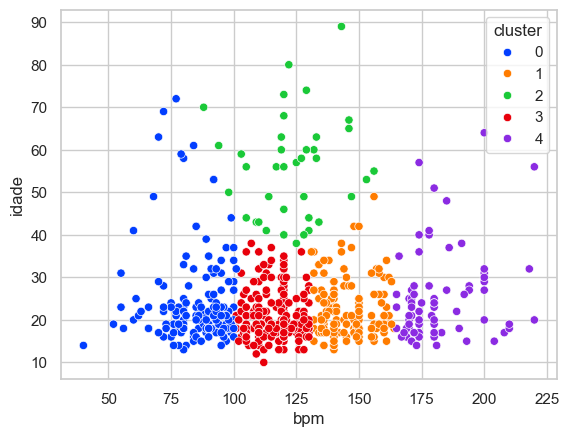

In [37]:
kmeans = KMeans(n_clusters=5, random_state=62)

kmeans.fit(X) # Treinando o modelo com 5 grupos.
X['cluster'] = kmeans.labels_
                
sns.scatterplot(data=X, x='bpm', y='idade', hue='cluster', palette='bright')


<Axes: xlabel='bpm', ylabel='idade'>

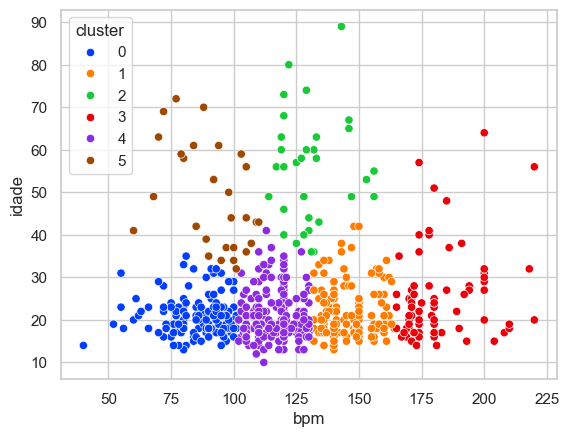

In [38]:
kmeans = KMeans(n_clusters=6, random_state=62)

kmeans.fit(X) # Treinando o modelo com 6 grupos.
X['cluster'] = kmeans.labels_
                
sns.scatterplot(data=X, x='bpm', y='idade', hue='cluster', palette='bright')

Será que a quantidade de pessoas que sentem insonia, é devido a ouvirem músicas muito agitada ?

### **Contando Quantas Pessoas do Clusters que Tem Insonia Acima de 4**

In [39]:
X['cluster'] == 3
X['insonia'] = df['insonia']

pessoas_com_insonia_cluster0 = X[(X['cluster'] == 0) & (X['insonia'] > 4)]
pessoas_com_insonia_cluster1 = X[(X['cluster'] == 1) & (X['insonia'] > 4)]
pessoas_com_insonia_cluster2 = X[(X['cluster'] == 2) & (X['insonia'] > 4)]
pessoas_com_insonia_cluster3 = X[(X['cluster'] == 3) & (X['insonia'] > 4)]
pessoas_com_insonia_cluster4 = X[(X['cluster'] == 4) & (X['insonia'] > 4)]
pessoas_com_insonia_cluster5 = X[(X['cluster'] == 5) & (X['insonia'] > 4)]

### **Calculando a Porcentagem de Pessoas com Ansiedade Acima de 4 no Cluster 0, 1, 2, 3**

In [40]:

porcentagem_insonia_cluster0 = (len(pessoas_com_insonia_cluster0) / len(X[X['cluster'] == 0])) * 100

porcentagem_insonia_cluster1 = (len(pessoas_com_insonia_cluster1) / len(X[X['cluster'] == 1])) * 100

porcentagem_insonia_cluster2 = (len(pessoas_com_insonia_cluster2) / len(X[X['cluster'] == 2])) * 100

porcentagem_insonia_cluster3 = (len(pessoas_com_insonia_cluster3) / len(X[X['cluster'] == 3])) * 100

porcentagem_insonia_cluster4 = (len(pessoas_com_insonia_cluster4) / len(X[X['cluster'] == 4])) * 100

porcentagem_insonia_cluster5 = (len(pessoas_com_insonia_cluster5) / len(X[X['cluster'] == 5])) * 100

### **Porcentagem de Pessoas com Insonia Acima de 4 no Clusters 0, 1, 2, 3, 4, 5**


In [41]:
print(f"{porcentagem_insonia_cluster0:.2f}% de pessoas com insonia acima de 4 no grupo azul")
print(f"{porcentagem_insonia_cluster1:.2f}% de pessoas com insonia acima de 4 no grupo laranja")
print(f"{porcentagem_insonia_cluster2:.2f}% de pessoas com insonia acima de 4 no grupo verde")
print(f"{porcentagem_insonia_cluster3:.2f}% de pessoas com insonia acima de 4 no grupo vermelho")
print(f"{porcentagem_insonia_cluster4:.2f}% de pessoas com insonia acima de 4 no grupo roxo")
print(f"{porcentagem_insonia_cluster5:.2f}% de pessoas com insonia acima de 4 no grupo marrom")


32.86% de pessoas com insonia acima de 4 no grupo azul
45.52% de pessoas com insonia acima de 4 no grupo laranja
36.36% de pessoas com insonia acima de 4 no grupo verde
42.47% de pessoas com insonia acima de 4 no grupo vermelho
42.03% de pessoas com insonia acima de 4 no grupo roxo
48.39% de pessoas com insonia acima de 4 no grupo marrom


Com essa análise, podemos notar que as pessoas que mais sentem insônia é o grupo marrom.

In [42]:
Y = df[['idade', 'minutos_por_dia']] # Escolhendo as colunas 'idade' e 'bpm'
Y = Y.fillna(Y.median()) # Preenchendo valores NaN com a mediana

kmeans = KMeans(n_clusters=4, random_state=62)

kmeans.fit(Y) # Treinando o modelo com 4 grupos.

# Adicionando uma nova coluna com os grupos criados.

Y['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

ansiedade_cluster_0 = df.loc[df['cluster'] == 0, 'ansiedade']
# Exibir os valores de ansiedade para o cluster 0 no kmeans

df['ansiedade_cluster_0'] = ansiedade_cluster_0


In [43]:
# Contando quantos elementos existem em cada cluster.

print(Y['cluster'].value_counts())

cluster
3    338
0    216
2    145
1     37
Name: count, dtype: int64


### **Analisando o Tempo que as Pessoas Passam Ouvindo Música Durante o Dia e sua Respectiva Idade**

<Axes: >

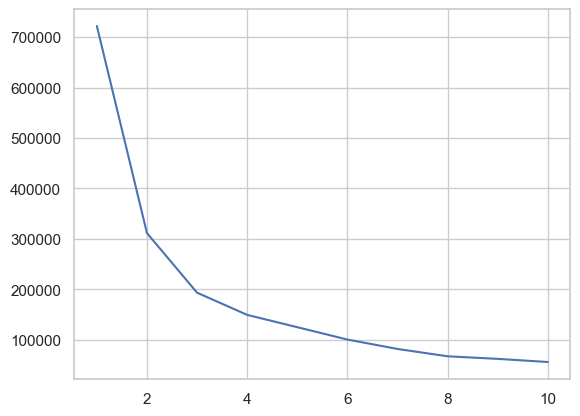

In [44]:
YCluster0 = df[['idade', 'minutos_por_dia']] # Escolhendo as colunas 'idade' e 'minutos_por_dia'
# Preencher os valores NaN de Y com a mediana dos valores da coluna
YCluster0 = YCluster0.fillna(YCluster0.median()) 

inertias_y = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(YCluster0)
    inertias_y.append(kmeans.inertia_)

# Mostrando o "cotovelo" do gráfico.

sns.lineplot(x=range(1,11), y=inertias)    

O parâmetro n_clusters define quantos grupos queremos dividir os dados, já random_state é a semente para a geração de números aleatórios.

In [45]:
kmeans = KMeans(n_clusters=4, random_state=3)

kmeans.fit(YCluster0) # Treinando o modelo com 4 grupos.


KMeans(n_clusters=4, random_state=3)

<Axes: xlabel='idade', ylabel='minutos_por_dia'>

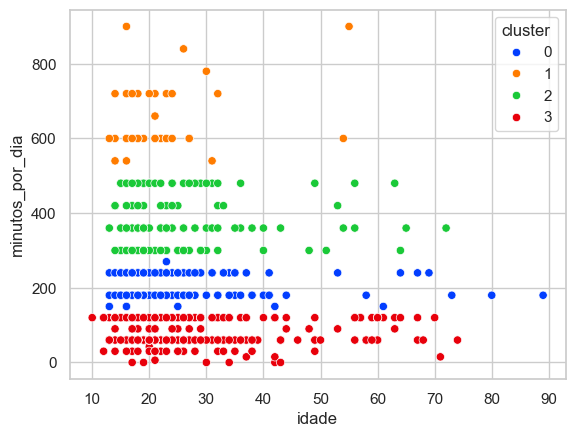

In [46]:
sns.scatterplot(data=df, x='idade', y='minutos_por_dia', hue='cluster', palette='bright')

### **Resultados das Nossas Análises Utilizando K-Means**

**1. Algum padrão foi detectado?**
* Sim, padrões claros foram identificados. Há uma divisão principal entre dois tipos de grupos:
  - **Grupos azul, verde, laranja:** Composto por pessoas entre 10 e 40 anos, que apresentam maior diversidade na velocidade das músicas preferidas. Essas pessoas também mostram uma relação significativa com níveis de ansiedade, sendo que no grupo azul, 73% têm ansiedade acima de nível 4.
  - **Grupo vermelho:** Pessoas mais velhas que tendem a preferir músicas mais calmas, o que pode sugerir uma correlação com uma menor propensão a altos níveis de ansiedade.
* Além disso, foi observado que o grupo marrom, embora não mencionado na divisão etária, é o que mais relata insônia.

**2. Alguma nova pergunta foi descoberta ao analisar os agrupamentos?**
* Sim, algumas novas questões emergem:
  - **Qual é a relação exata entre a velocidade da música e os níveis de ansiedade?** Existe uma correlação direta, ou outros fatores estão influenciando esses níveis?
  - **Por que o grupo marrom é o que mais sente insônia?** Seria possível que a insônia tenha alguma relação com a música ou outros fatores demográficos não analisados diretamente?
  - **Como a faixa etária influencia diretamente os níveis de ansiedade e as preferências musicais?** Poderiam existir outros fatores que não foram contemplados e que também afetam essa correlação?